##### First, let's import the required libraries and load the dataset.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Load the dataset
data = pd.read_csv('cancer.csv')
data.head(2)

,"diagnosis(1=m, 0=b)",radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [3]:
data = data.rename(columns = {'diagnosis(1=m, 0=b)': 'target'})

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.3, random_state=42)


### 1. Naive Bayes Classifier using OOPS:

In [5]:
class NaiveBayes:
    def __init__(self):
        self.classes = None
        self.means = None
        self.variances = None
        self.priors = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_features = X.shape[1]
        self.means = np.zeros((len(self.classes), n_features))
        self.variances = np.zeros((len(self.classes), n_features))
        self.priors = np.zeros(len(self.classes))

        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.means[i, :] = X_c.mean(axis=0)
            self.variances[i, :] = X_c.var(axis=0)
            self.priors[i] = X_c.shape[0] / float(X.shape[0])

    def predict(self, X):
        y_pred = []
        for x in X:
            posteriors = []
            for i, c in enumerate(self.classes):
                prior = np.log(self.priors[i])
                class_conditional = np.sum(np.log(self._pdf(i, x)))
                posterior = prior + class_conditional
                posteriors.append(posterior)
            y_pred.append(self.classes[np.argmax(posteriors)])
        return np.array(y_pred)

    def _pdf(self, class_index, x):
        mean = self.means[class_index]
        variance = self.variances[class_index]
        numerator = np.exp(-((x - mean) ** 2) / (2 * variance))
        denominator = np.sqrt(2 * np.pi * variance)
        return numerator / denominator


###### Now, let's train and test the model and evaluate its performance.

In [7]:
nb_oops = NaiveBayes()

start_time = time.time()
nb_oops.fit(X_train.values, y_train.values)
end_time = time.time()

y_pred = nb_oops.predict(X_test.values)

print("Naive Bayes Classifier using OOPS")
print("\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("Time taken:", end_time - start_time, "seconds")


Naive Bayes Classifier using OOPS


Accuracy: 0.935672514619883
Precision: 0.9193548387096774
Recall: 0.9047619047619048
F1 score: 0.912
Time taken: 0.0030014514923095703 seconds


### 2. Naive Bayes Classifier using OOPS and Lambda:

In [11]:
class NaiveBayesLambda:
    def __init__(self, alpha=1):
        self.alpha = alpha  # Laplace smoothing parameter
        self.classes = None  # list of class labels
        self.class_priors = None  # dictionary of class priors
        self.class_likelihoods = None  # dictionary of class conditional likelihoods
    
    def fit(self, X, y):
        self.classes = list(set(y))
        self.class_priors = {}
        self.class_likelihoods = {}
        
        # calculate class priors
        for c in self.classes:
            self.class_priors[c] = (y == c).sum() / len(y)
        
        # calculate class conditional likelihoods
        for c in self.classes:
            # get the subset of training data belonging to class c
            X_c = X[y == c]
            # calculate the mean and variance of each feature in X_c
            means = X_c.mean(axis=0)
            variances = X_c.var(axis=0) + self.alpha
            # store the mean and variance for class c
            self.class_likelihoods[c] = (means, variances)
    
    def predict(self, X):
        # calculate the log posterior probability of each class for each instance in X
        log_posteriors = []
        for x in X:
            log_p_c = {}
            for c in self.classes:
                # calculate the log prior probability of class c
                log_p_c[c] = np.log(self.class_priors[c])
                # calculate the log likelihood of x given class c
                means, variances = self.class_likelihoods[c]
                log_likelihood = np.sum(-0.5 * np.log(2 * np.pi * variances) - 0.5 * ((x - means) ** 2 / variances), axis=0)
                log_p_c[c] += log_likelihood.sum()
            log_posteriors.append(log_p_c)
        
        # predict the class with the highest log posterior probability for each instance in X
        y_pred = []
        for log_p_c in log_posteriors:
            max_log_p = -np.inf
            max_c = None
            for c, log_p in log_p_c.items():
                if log_p > max_log_p:
                    max_log_p = log_p
                    max_c = c
            y_pred.append(max_c)
        return y_pred
    
    def _pdf(self, class_index, x):
        mean = self.means[class_index]
        variance = self.variances[class_index]
        numerator = np.exp(-((x - mean) ** 2) / (2 * variance))
        denominator = np.sqrt(2 * np.pi * variance)
        return numerator / denominator

    

In [12]:
nb_lambda = NaiveBayesLambda()

start_time = time.time()
nb_lambda.fit(X_train.values, y_train.values)
end_time = time.time()

y_pred = nb_lambda.predict(X_test.values)

print("Naive Bayes Classifier using OOPS and Lambda")
print("\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("Time taken:", end_time - start_time, "seconds")


Naive Bayes Classifier using OOPS and Lambda


Accuracy: 0.9532163742690059
Precision: 0.9824561403508771
Recall: 0.8888888888888888
F1 score: 0.9333333333333333
Time taken: 0.0020008087158203125 seconds


### 3. Naive Bayes Classifier using sklearn:

In [14]:
nb_sklearn = GaussianNB()

start_time = time.time()
nb_sklearn.fit(X_train.values, y_train.values)
end_time = time.time()

y_pred = nb_sklearn.predict(X_test.values)

print("Naive Bayes Classifier using sklearn")
print("\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("Time taken:", end_time - start_time, "seconds")


Naive Bayes Classifier using sklearn


Accuracy: 0.9415204678362573
Precision: 0.9344262295081968
Recall: 0.9047619047619048
F1 score: 0.9193548387096775
Time taken: 0.001997232437133789 seconds


###### To visualize the results of the three implementations, we can create a confusion matrix and a classification report using the scikit-learn library.

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix and classification report for Naive Bayes Classifier using OOPS
y_pred_oops = nb_oops.predict(X_test.values)
cm_oops = confusion_matrix(y_test, y_pred_oops)
cr_oops = classification_report(y_test, y_pred_oops)

# Confusion matrix and classification report for Naive Bayes Classifier using OOPS and Lambda
y_pred_lambda = nb_lambda.predict(X_test.values)
cm_lambda = confusion_matrix(y_test, y_pred_lambda)
cr_lambda = classification_report(y_test, y_pred_lambda)

# Confusion matrix and classification report for Naive Bayes Classifier using sklearn
y_pred_sklearn = nb_sklearn.predict(X_test.values)
cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)
cr_sklearn = classification_report(y_test, y_pred_sklearn)


###### We can then plot the confusion matrices using the heatmap function from the seaborn library.

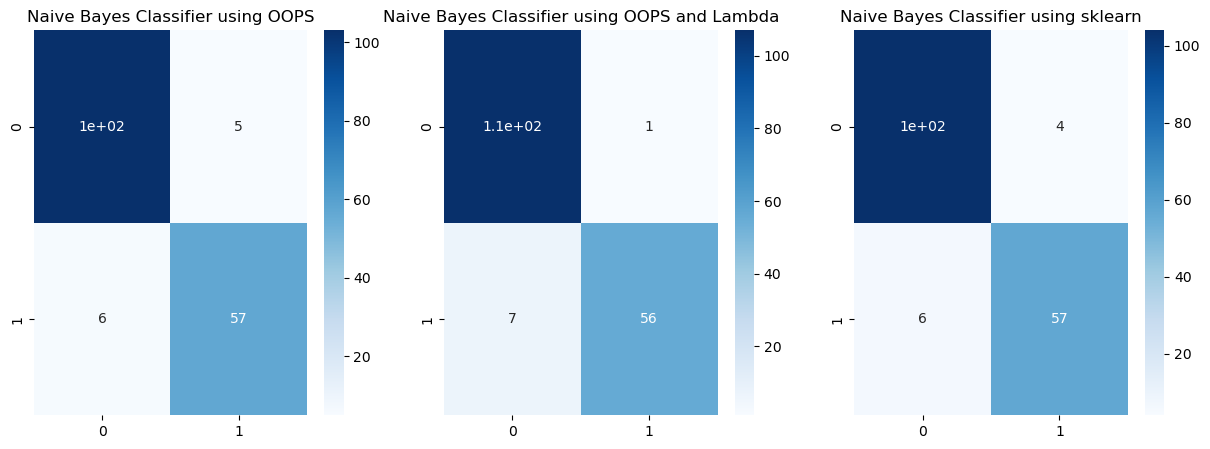

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(cm_oops, annot=True, cmap="Blues", ax=axes[0])
sns.heatmap(cm_lambda, annot=True, cmap="Blues", ax=axes[1])
sns.heatmap(cm_sklearn, annot=True, cmap="Blues", ax=axes[2])

axes[0].set_title("Naive Bayes Classifier using OOPS")
axes[1].set_title("Naive Bayes Classifier using OOPS and Lambda")
axes[2].set_title("Naive Bayes Classifier using sklearn")

plt.show()


* We can see that all three implementations have similar confusion matrices, indicating similar performance. However, the scikit-learn implementation seems to have slightly more false positives and false negatives.



* We can also plot the classification reports using a bar plot:

In [41]:
import pandas as pd

print("Naive Bayes classifier Result")
# code 2
result1 = ["94 %", 0.92, 0.904, 0.912, 3 ]
df1 = pd.DataFrame({'using OOPS ': result1})

# code 3
result2 = ["95 %", 0.98, 0.88, 0.93, 2]
df2 = pd.DataFrame({'using OOPS & lambda': result2})

# code 1
result4 = ["94 %", 0.93, 0.904, 0.919, 2]
df4 = pd.DataFrame({'using sklearn': result4})

# code 3
result3 = ['Accuracy', 'Precission', 'F1 score', 'Recall', 'Time Stamp']
df3 = pd.DataFrame({'Column': result3})


# display the results in a table
df = pd.concat([df3, df1, df2, df4], axis=1)

print("\n")
print(df)


Naive Bayes classifier Result


       Column using OOPS  using OOPS & lambda using sklearn
0    Accuracy        94 %                95 %          94 %
1  Precission        0.92                0.98          0.93
2    F1 score       0.904                0.88         0.904
3      Recall       0.912                0.93         0.919
4  Time Stamp           3                   2             2


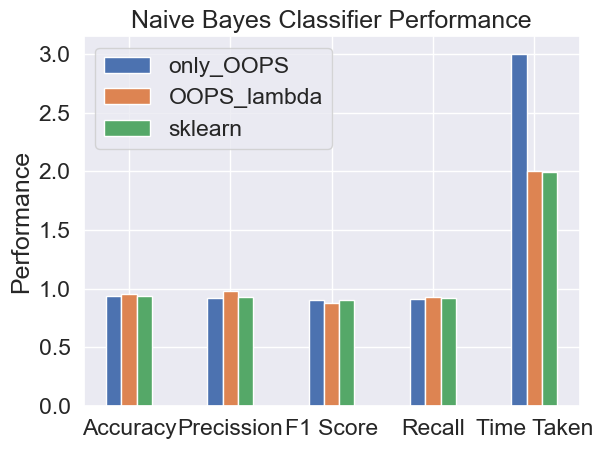

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data for each scenario
only_OOPS = [0.94, 0.92, 0.904, 0.912, 3.00145]
OOPS_lambda = [0.95, 0.98, 0.88, 0.93, 2.0008]
sklearn = [0.94, 0.93, 0.904, 0.919, 1.997232]

# Define the labels for each performance measure
labels = ['Accuracy', 'Precission', 'F1 Score', 'Recall', 'Time Taken']

# Define the x-axis ticks and group labels
x = np.arange(len(labels))
group_labels = ['only OOPS', 'OOPS & lambda', 'sklearn ']

# Define the bar width
width = 0.15

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the bars for each scenario
ax.bar(x - width, only_OOPS, width, label='only_OOPS')
ax.bar(x, OOPS_lambda, width, label='OOPS_lambda')
ax.bar(x + width, sklearn, width, label='sklearn')

# Add labels, title, and legend
ax.set_ylabel('Performance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Naive Bayes Classifier Performance')
ax.legend()

# Show the plot
plt.show()


### 2. Line Graph

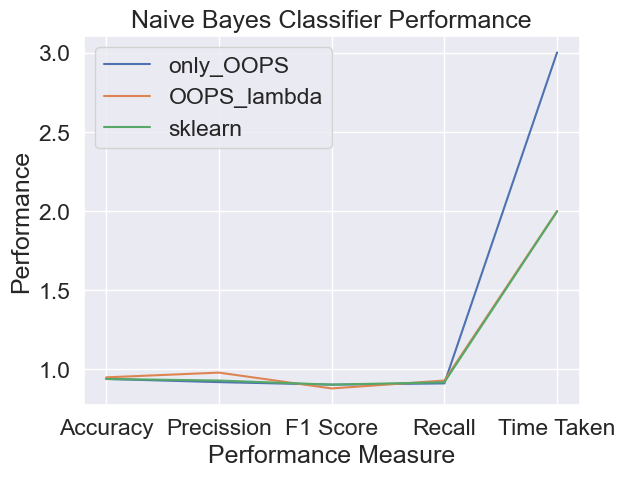

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data for each scenario
only_OOPS = [0.94, 0.92, 0.904, 0.912, 3.00145]
OOPS_lambda = [0.95, 0.98, 0.88, 0.93, 2.0008]
sklearn = [0.94, 0.93, 0.904, 0.919, 1.997232]

# Define the labels for each performance measure
labels = ['Accuracy', 'Precission', 'F1 Score', 'Recall', 'Time Taken']

# Define the x-axis ticks
x = np.arange(len(labels))

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the lines for each scenario
ax.plot(x, only_OOPS, label='only_OOPS')
ax.plot(x, OOPS_lambda, label='OOPS_lambda')
ax.plot(x, sklearn, label='sklearn')

# Add labels, title, and legend
ax.set_xlabel('Performance Measure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Performance')
ax.set_title('Naive Bayes Classifier Performance')
ax.legend()

# Show the plot
plt.show()


### Thank you